## **WEEK 4 EXERCISES - RANDOMIZED BLOCKING**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

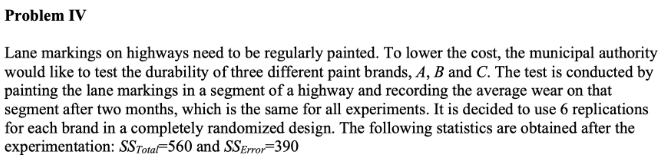

##  Q1
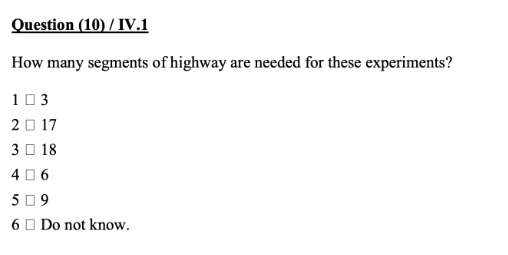


In [1]:
treatments = 3
replications = 6
segments = treatments * replications

segments

18

---
## Q2

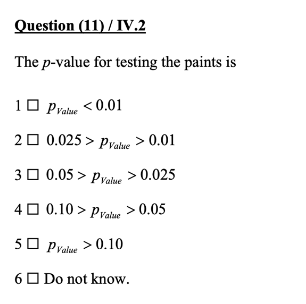

1. What are we given
   SS_total = 560
   SS_error = 390
2. degrees of freedom:
   Total: N - 1 = 18 - 1 = 17
   Treatsments:.a - 1 = 3 - 1 = 2
   error: 17 - 2 = 15



In [4]:
import scipy.stats as stats

# Given values
SS_total = 560
SS_error = 390
df_total = 17
df_treatment = 2
df_error = 15

# Treatment SS
SS_treatment = SS_total - SS_error

# Mean squares
MS_treatment = SS_treatment / df_treatment
MS_error = SS_error / df_error

# F-statistic
F_stat = MS_treatment / MS_error

# p-value (right-tail probability)
p_value = 1 - stats.f.cdf(F_stat, df_treatment, df_error)

F_stat, p_value


(3.269230769230769, 0.06630928578282091)

**Answer is answer 4**

---
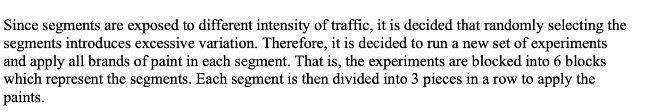

## Q3
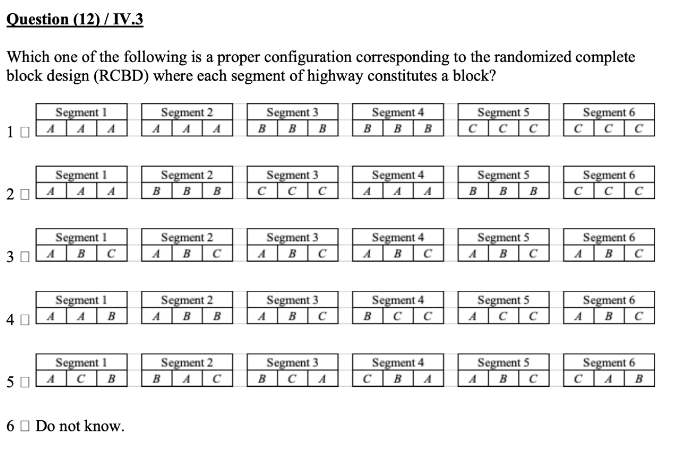

**In order to be an RCBD the factors need to be present in each block and in random order** - **answer is 5**

---
## Q4
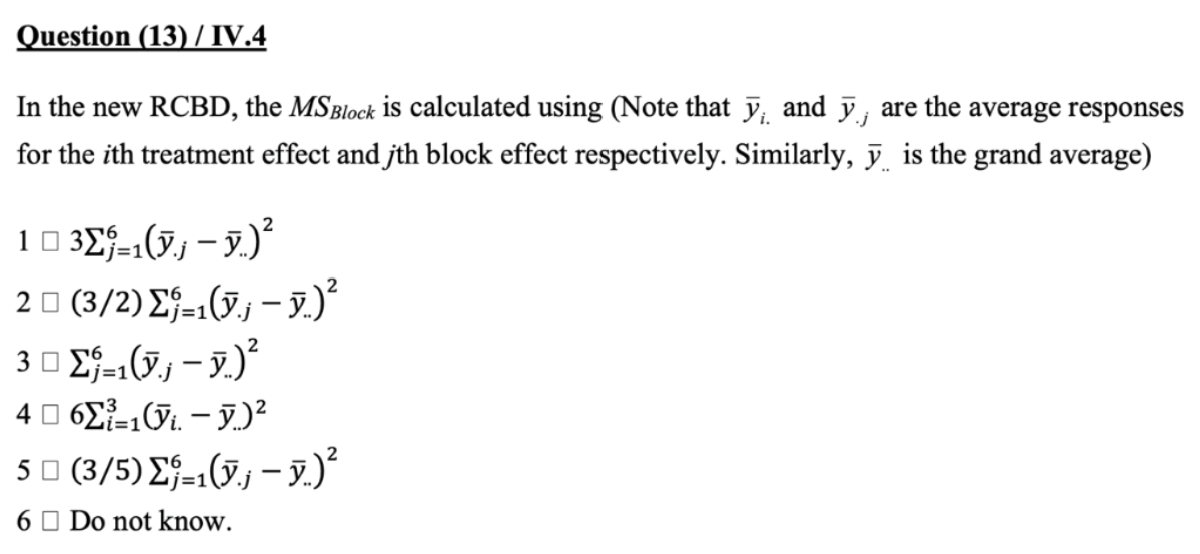

### ANOVA Table for RCBD

| Source       | DF         | SS                                               | MS                                                   | F-ratio                   |
|--------------|------------|--------------------------------------------------|------------------------------------------------------|---------------------------|
| Treatments   | a - 1 = 2  | SS_Treat = b * Σ (ȳᵢ. - ȳ..)²                   | MS_Treat = SS_Treat / (a - 1)                        | F = MS_Treat / MS_Error   |
| Blocks       | b - 1 = 5  | SS_Block = a * Σ (ȳ.j - ȳ..)²                   | MS_Block = SS_Block / (b - 1) = (3/5) Σ (ȳ.j - ȳ..)² |                           |
| Error        | (a-1)(b-1) = 10 | SS_Error = SSTotal - SSTreat - SSBlock     | MS_Error = SS_Error / (a-1)(b-1)                     |                           |
| Total        | ab - 1 = 17 | SSTotal                                          |                                                      |                           |

Where:
- `ȳᵢ.` = mean of treatment *i*  
- `ȳ.j` = mean of block *j*  
- `ȳ..` = grand mean


### Step 1. General RCBD formulas

- Number of treatments: $a = 3$  
- Number of blocks: $b = 6$

$$
SS_{Block} = a \sum_{j=1}^b \left(\bar{y}_{.j} - \bar{y}_{..}\right)^2
$$

$$
MS_{Block} = \frac{SS_{Block}}{b-1}
$$

---

### Step 2. Plug in values

Here: $a = 3$, $b = 6$

$$
SS_{Block} = 3 \sum_{j=1}^6 \left(\bar{y}_{.j} - \bar{y}_{..}\right)^2
$$

$$
MS_{Block} = \frac{3}{6-1} \sum_{j=1}^6 \left(\bar{y}_{.j} - \bar{y}_{..}\right)^2
$$

$$
MS_{Block} = \frac{3}{5} \sum_{j=1}^6 \left(\bar{y}_{.j} - \bar{y}_{..}\right)^2
$$

---

✅ **Final Answer: Option 5**


---
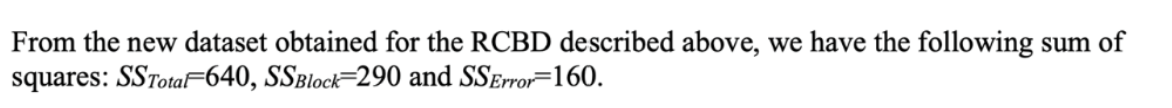
## Q5
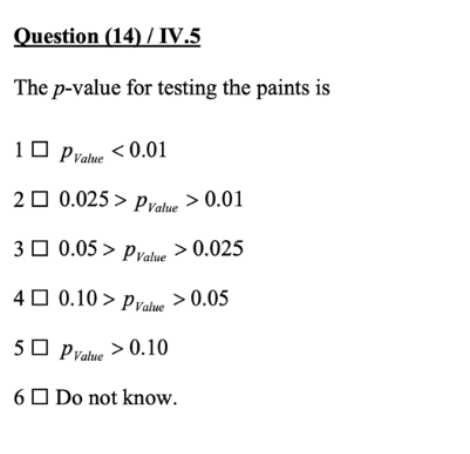


In [8]:
import scipy.stats as stats

# Given sums of squares
SS_total = 640
SS_block = 290
SS_error = 160

# Treatments SS
SS_treatments = SS_total - SS_block - SS_error   # 190

# Degrees of freedom
a, b = 3, 6
df_treatments = a - 1      # 2
df_blocks = b - 1          # 5
df_error = (a - 1) * (b - 1)  # 10
df_total = a * b - 1       # 17

# Mean Squares
MS_treatments = SS_treatments / df_treatments   # 95
MS_blocks = SS_block / df_blocks                # 58
MS_error = SS_error / df_error                  # 16

# F and p-value
F_stat = MS_treatments / MS_error
p_value = 1 - stats.f.cdf(F_stat, df_treatments, df_error)

print("F =", round(F_stat, 3))
print("p-value =", round(p_value, 4))


F = 5.938
p-value = 0.02


**answer is option 2**

---
## Q6
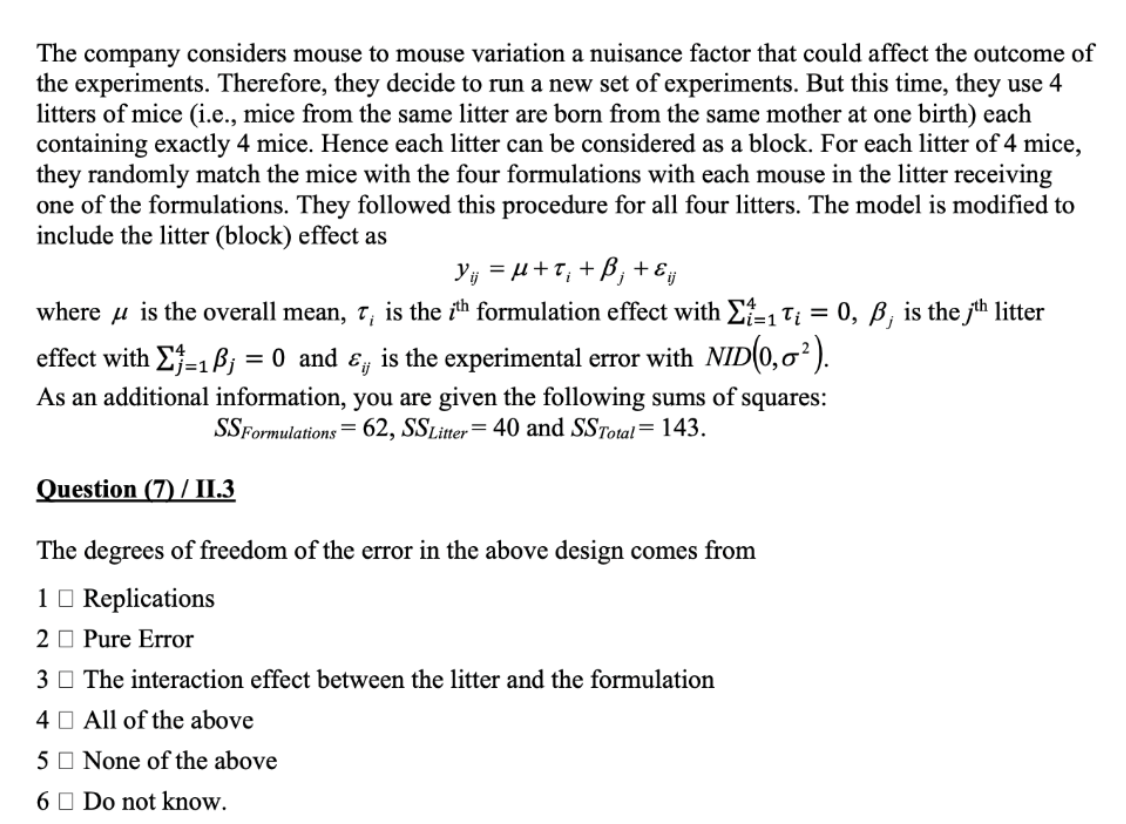

### Mouse-Litter RCBD Problem

We are given:

- Treatments (formulations): $a = 4$
- Blocks (litters): $b = 4$
- Total observations: $N = ab = 16$

Sums of Squares:
- $SS_{Formulations} = 62$
- $SS_{Litter} = 40$
- $SS_{Total} = 143$

So:

$$
SS_{Error} = SS_{Total} - SS_{Formulations} - SS_{Litter} 
= 143 - 62 - 40 = 41
$$

---

### Step 1. Degrees of Freedom

- Treatments: $a - 1 = 4 - 1 = 3$
- Blocks: $b - 1 = 4 - 1 = 3$
- Error: $(a-1)(b-1) = 3 \times 3 = 9$
- Total: $N - 1 = 16 - 1 = 15$

---

### Step 2. Source of Error DF

- There are **no replications** within cells → so no pure error.  
- The **interaction between treatment and block** is confounded with error.  
- Therefore, the error degrees of freedom come from the **treatment × block interaction**.  

---

✅ **Correct Answer: Option 3**  
*The interaction effect between the litter and the formulation*


---
## Q8
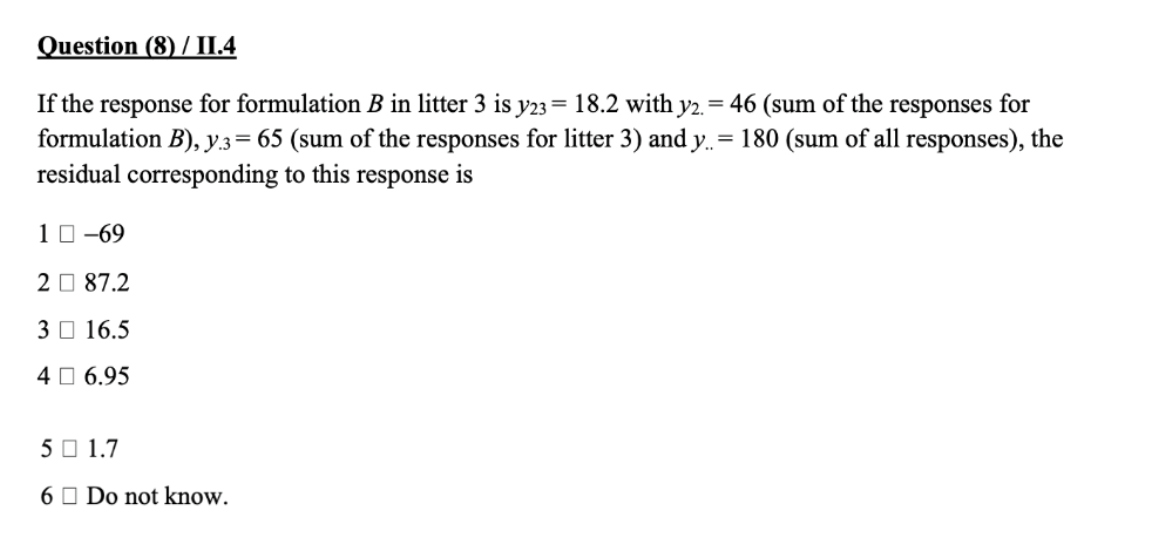

### Residual Calculation in RCBD

We are given:
- $y_{23} = 18.2$ (formulation B in litter 3)  
- $y_{2.} = 46$ (sum for formulation B across all litters)  
- $y_{.3} = 65$ (sum for litter 3 across all formulations)  
- $y_{..} = 180$ (grand total)  
- $a = 4$ formulations (treatments)  
- $b = 4$ litters (blocks)

---

**Step 1. Fitted value**

$$
\hat{y}_{ij} = \frac{y_{i.}}{b} + \frac{y_{.j}}{a} - \frac{y_{..}}{ab}
$$

$$
\hat{y}_{23} = \frac{46}{4} + \frac{65}{4} - \frac{180}{16}
= 11.5 + 16.25 - 11.25 = 16.5
$$

---

**Step 2. Residual**

$$
e_{23} = y_{23} - \hat{y}_{23} = 18.2 - 16.5 = 1.7
$$

---

✅ **Final Answer: Option 5 (1.7)**


In [9]:
# Given values
y_23 = 18.2      # observation
y2_dot = 46      # sum for formulation B
y_dot3 = 65      # sum for litter 3
y_dotdot = 180   # grand total

a, b = 4, 4  # 4 formulations, 4 litters

# Step 1: fitted value
y_hat_23 = (y2_dot / b) + (y_dot3 / a) - (y_dotdot / (a * b))

# Step 2: residual
residual = y_23 - y_hat_23

print("Fitted value =", round(y_hat_23, 2))
print("Residual =", round(residual, 2))


Fitted value = 16.5
Residual = 1.7


**answer is 5**

---
## Q9
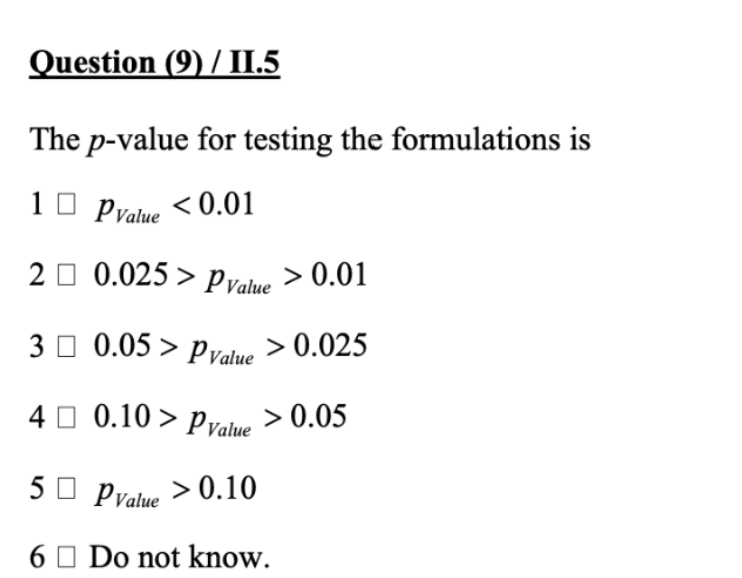

In [10]:
import scipy.stats as stats

# Given sums of squares
SS_form = 62
SS_litter = 40
SS_total = 143

# Step 1. Error SS
SS_error = SS_total - SS_form - SS_litter

# Step 2. Degrees of freedom
a, b = 4, 4
df_form = a - 1
df_litter = b - 1
df_error = (a - 1) * (b - 1)

# Step 3. Mean squares
MS_form = SS_form / df_form
MS_litter = SS_litter / df_litter
MS_error = SS_error / df_error

# Step 4. F-statistic
F_stat = MS_form / MS_error

# Step 5. p-value
p_value = 1 - stats.f.cdf(F_stat, df_form, df_error)

print("F =", round(F_stat, 3))
print("p-value =", round(p_value, 4))


F = 4.537
p-value = 0.0336


**option 3 is the answer**